In [73]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

from sklearn.ensemble import BaggingClassifier

In [74]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

In [75]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [76]:
diabetes_df['outcome'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [77]:
# Rename the columns
diabetes_df = diabetes_df.rename(columns={
    's1': 'total serum cholesterol',
    's2': 'LDL cholesterol',
    's3': 'HDL cholesterol',
    's4': 'total cholesterol',
    's5': 'log of serum triglycerides level',
    's6': 'blood sugar level'
})

In [78]:
diabetes_df['outcome'] = (diabetes.target > 150).astype(int)
diabetes_df

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1


In [79]:
diabetes_df

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1


In [80]:
diabetes_df.to_csv('diabetes_data.csv', index=False)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

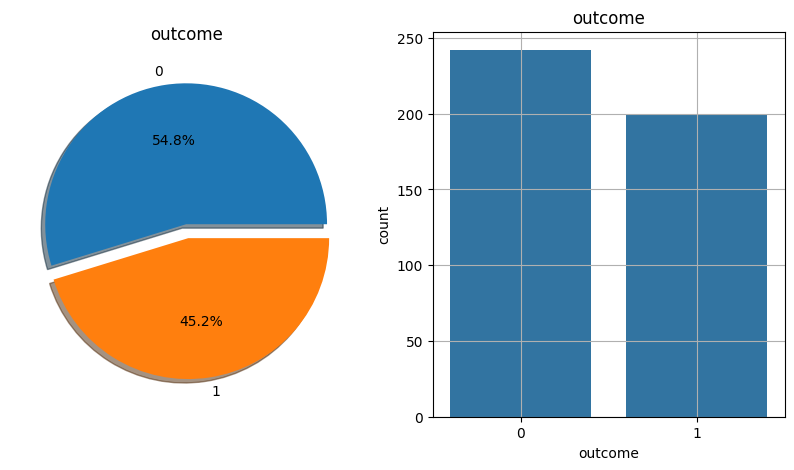

In [82]:


# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
diabetes_df['outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')

sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()


plt.grid()
plt.show()

In [83]:
diabetes_df['outcome'].value_counts()

outcome
0    242
1    200
Name: count, dtype: int64

# **Split the Data (Train Test Split)**

In [84]:
X=diabetes_df.drop(columns='outcome',axis=1)
Y=diabetes_df['outcome']

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [86]:
from sklearn.feature_selection import mutual_info_classif

In [87]:
mutual_info = mutual_info_classif(X_train, y_train, random_state = 0)
mutual_info

array([0.0019648 , 0.        , 0.13664471, 0.08951157, 0.        ,
       0.02467125, 0.07820157, 0.07672385, 0.16233415, 0.05709121])

In [88]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

log of serum triglycerides level    0.162334
bmi                                 0.136645
bp                                  0.089512
HDL cholesterol                     0.078202
total cholesterol                   0.076724
blood sugar level                   0.057091
LDL cholesterol                     0.024671
age                                 0.001965
sex                                 0.000000
total serum cholesterol             0.000000
dtype: float64

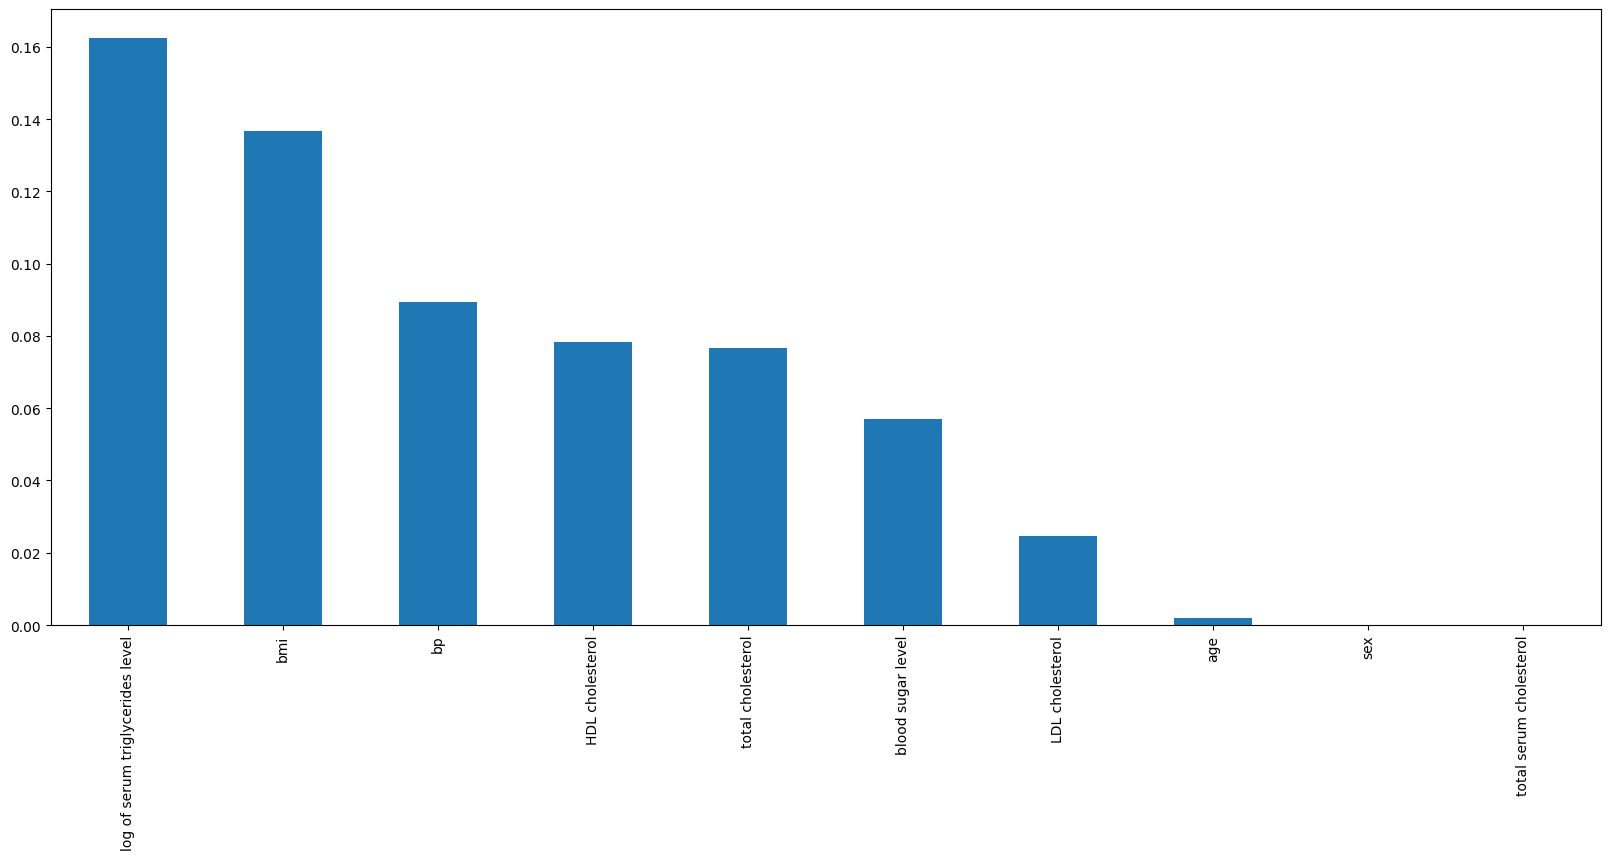

In [89]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

In [90]:
diabetes_df.head(10)

,age,sex,bmi,bp,total serum cholesterol,LDL cholesterol,HDL cholesterol,total cholesterol,log of serum triglycerides level,blood sugar level,outcome
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,1


In [91]:
X = diabetes_df.drop(columns='outcome', axis=1)
Y = diabetes_df['outcome']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify =Y )

In [93]:
print(X.shape, X_train.shape,y_train.shape, X_test.shape)

(442, 10) (353, 10) (353,) (89, 10)


# ADSYN IMPlementaion

In [94]:
from imblearn.over_sampling import ADASYN
from collections import Counter

counter  = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=0,sampling_strategy='minority')

X_smote, y_smote = ada.fit_resample(X_train, y_train)

counter = Counter(y_smote)
print('After',counter)

Before Counter({0: 193, 1: 160})
After Counter({0: 193, 1: 172})


In [95]:

# Befor smote
y_train.value_counts()

outcome
0    193
1    160
Name: count, dtype: int64

In [96]:

# after smote

y_smote.value_counts()

outcome
0    193
1    172
Name: count, dtype: int64

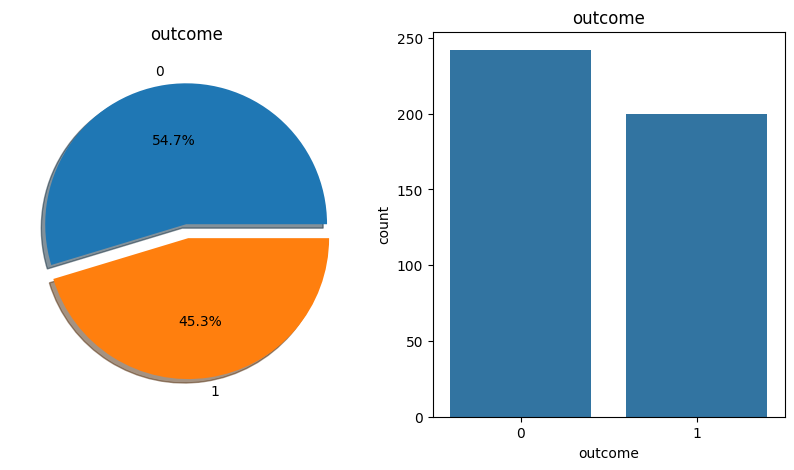

In [97]:
# outcome before smote
f,ax = plt.subplots(1,2, figsize=(10,5))
y_train.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')

sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()



plt.show()

# After smote

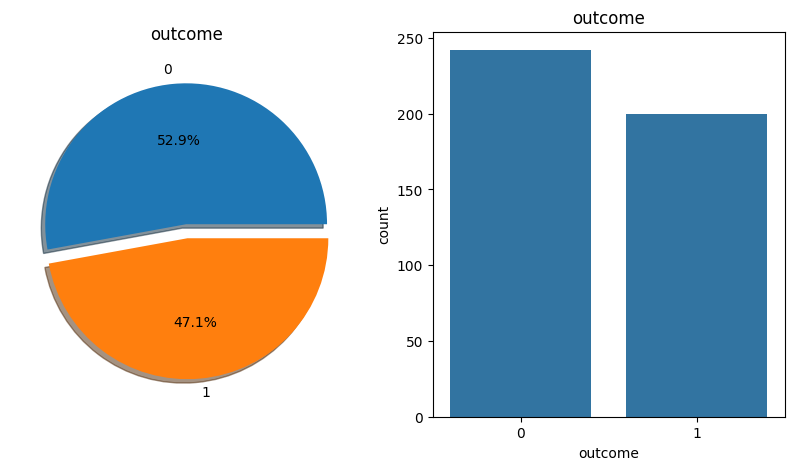

In [98]:
# outcome
f,ax = plt.subplots(1,2, figsize=(10,5))
y_smote.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('outcome')
ax[0].set_ylabel('')

sns.countplot(x='outcome', data=diabetes_df, ax=ax[1])  # Removed the 'ax' parameter
ax[1].set_title('outcome')
N,P = diabetes_df['outcome'].value_counts()



plt.show()

In [99]:

# Befor smote
y_train.value_counts()

outcome
0    193
1    160
Name: count, dtype: int64

In [100]:
# after smote

y_smote.value_counts()

outcome
0    193
1    172
Name: count, dtype: int64

#  **Grid search on svm (PERFECTLY DONE)**



In [101]:
from sklearn.svm import SVC

In [102]:
svm_clf = svm.SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
# fitting the model for grid search
svm_grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.534 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.630 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.658 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.795 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.671 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.795 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.740 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.0s
[CV 5/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [103]:
svm_grid.best_estimator_
svm_bestgrid=svm_grid.best_estimator_
svm_bestgrid

SVC(C=1, gamma=1)

In [104]:
y_pred=svm_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [15 25]]
Accuracy Score 0.7528089887640449
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        49
           1       0.78      0.62      0.69        40

    accuracy                           0.75        89
   macro avg       0.76      0.74      0.74        89
weighted avg       0.76      0.75      0.75        89



**K-fold cross validation(SVM)**

In [105]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(svm_grid,X,Y,cv=skfold)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.549 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [106]:
cv_score

array([0.71910112, 0.79775281, 0.65909091, 0.70454545, 0.78409091])

In [107]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7329162410623085 +/- 0.05151420353109062


# **Bagging Decision tree(PERFECTLY DONE)**


In [108]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=5, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [109]:
y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [18 22]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.76      0.55      0.64        40

    accuracy                           0.72        89
   macro avg       0.73      0.70      0.70        89
weighted avg       0.73      0.72      0.71        89



**K-fold cross validation (Bagging)**

In [110]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [111]:
cv_score

array([0.69662921, 0.78651685, 0.69318182, 0.76136364, 0.73863636])

In [112]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7352655771195098 +/- 0.036284915969007264


# **Decision Tree(Perfectly Done)**

Depth =  2 , Training Accuracy =  0.7561643835616438 , Test Accuracy =  0.651685393258427 , Diff =  10.447899030321683  %
Depth =  3 , Training Accuracy =  0.7808219178082192 , Test Accuracy =  0.6966292134831461 , Diff =  8.419270432507309  %
Depth =  4 , Training Accuracy =  0.8191780821917808 , Test Accuracy =  0.6966292134831461 , Diff =  12.25488687086347  %
Depth =  5 , Training Accuracy =  0.8547945205479452 , Test Accuracy =  0.651685393258427 , Diff =  20.310912728951823  %
Depth =  6 , Training Accuracy =  0.9013698630136986 , Test Accuracy =  0.651685393258427 , Diff =  24.968446975527158  %
Depth =  7 , Training Accuracy =  0.936986301369863 , Test Accuracy =  0.6741573033707865 , Diff =  26.282899799907653  %
Depth =  8 , Training Accuracy =  0.958904109589041 , Test Accuracy =  0.651685393258427 , Diff =  30.721871633061404  %
Depth =  9 , Training Accuracy =  0.9863013698630136 , Test Accuracy =  0.6629213483146067 , Diff =  32.338002154840694  %
Depth =  10 , Training A

Text(0, 0.5, 'Accuracy')

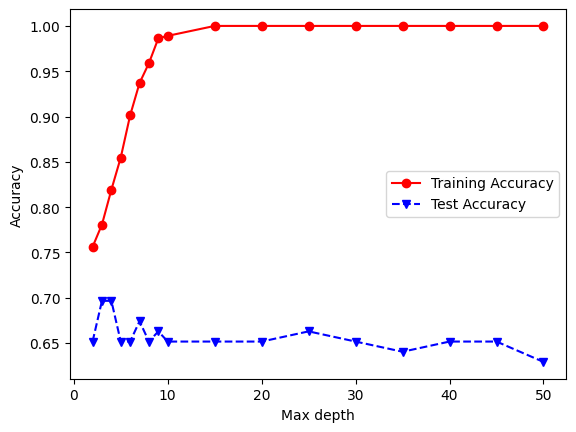

In [113]:
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [114]:
# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [115]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7561643835616438
Testing Accuracy is:  0.651685393258427
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        49
           1       0.66      0.47      0.55        40

    accuracy                           0.65        89
   macro avg       0.65      0.64      0.63        89
weighted avg       0.65      0.65      0.64        89



In [116]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)


In [117]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7035750766087845 +/- 0.03277781844623685


# **Logistic** **Regression(Perfectly Done)**

In [118]:
lr = LogisticRegression()
from sklearn.model_selection import GridSearchCV

grid_params = { 'max_iter' : [10000],
               'warm_start' : [False,True],
               'penalty' : ['l1', 'l2', 'elasticnet']
               
               }

lr_grid = GridSearchCV(
    LogisticRegression(),
    grid_params,
    verbose  = 1,
    scoring='accuracy',
    cv = 3,
    n_jobs = -1
    )
    
lr_grid.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
12 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wra

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'warm_start': [False, True]},
             scoring='accuracy', verbose=1)

In [119]:
lr_bestgrid=lr_grid.best_estimator_

In [120]:
y_pred=lr_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[41  8]
 [17 23]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        49
           1       0.74      0.57      0.65        40

    accuracy                           0.72        89
   macro avg       0.72      0.71      0.71        89
weighted avg       0.72      0.72      0.71        89



In [121]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(lr_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7353166496424924 +/- 0.051584196332268996


# **Gausien Naive Bays(Perfectly Done)**

In [122]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(GaussianNB(), 
                 param_grid=params_NB, 
                 cv=3,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_smote, y_smote)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [123]:
gs_NB.best_params_

{'var_smoothing': 0.15199110829529336}

In [124]:
gs_NB=gs_NB.best_estimator_


In [125]:
y_pred=gs_NB.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[40  9]
 [15 25]]
Accuracy Score 0.7303370786516854
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        49
           1       0.74      0.62      0.68        40

    accuracy                           0.73        89
   macro avg       0.73      0.72      0.72        89
weighted avg       0.73      0.73      0.73        89



In [126]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(GaussianNB(),X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7263023493360572 +/- 0.06201146578056308



# **Random Forest(Perfectly Done)**

In [127]:
###The hyperparameter we got from grid search
rf=RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
### fit the randomized model
rf.fit(X_smote, y_smote)


RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)

In [128]:
from sklearn.metrics import accuracy_score
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[43  6]
 [20 20]]
Accuracy Score 0.7078651685393258
              precision    recall  f1-score   support

           0       0.68      0.88      0.77        49
           1       0.77      0.50      0.61        40

    accuracy                           0.71        89
   macro avg       0.73      0.69      0.69        89
weighted avg       0.72      0.71      0.70        89



In [129]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(rf,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7260725229826355 +/- 0.04788117806792377


# **XG Boost(Perfectly Done)**

In [130]:
###The hyperparameter we got from grid search
from xgboost import XGBClassifier
xgbc = XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_smote, y_smote)

In [131]:
from sklearn.metrics import accuracy_score
y_pred=xgbc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

[[44  5]
 [20 20]]
Accuracy Score 0.7191011235955056
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        49
           1       0.80      0.50      0.62        40

    accuracy                           0.72        89
   macro avg       0.74      0.70      0.70        89
weighted avg       0.74      0.72      0.71        89



In [132]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(xgbc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7125638406537284 +/- 0.047233759584659744


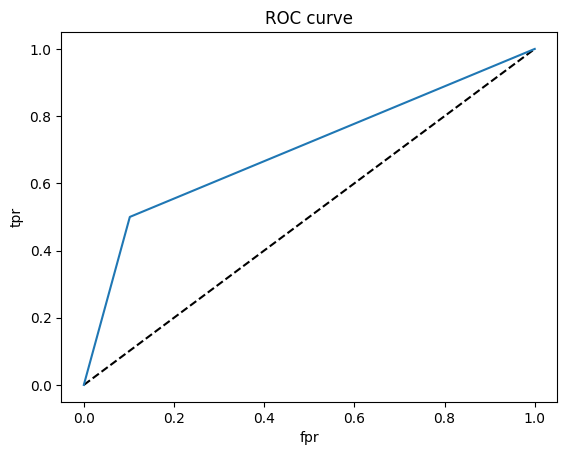

In [133]:
from sklearn.metrics import roc_curve
y_pred = xgbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# **Ada Boost(Perfectly Done)**

In [134]:
from sklearn.ensemble import AdaBoostClassifier
#lrc = LogisticRegression(max_iter=1100)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_smote, y_smote)

print(classification_report(y_test,abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.86      0.76        49
           1       0.75      0.53      0.62        40

    accuracy                           0.71        89
   macro avg       0.72      0.69      0.69        89
weighted avg       0.72      0.71      0.70        89



/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [135]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(abc,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgia

Results =  0.7126149131767109 +/- 0.039277592675902154


# KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_smote, y_smote)

# accuracy score on the test data
knn_prediction = knn.predict(X_test) 
knn_prediction_accuracy = accuracy_score(knn_prediction, y_test) 
print('Accuracy score of Test data: ', knn_prediction_accuracy)
print(classification_report(y_test, knn_prediction)) 

Accuracy score of Test data:  0.7191011235955056
              precision    recall  f1-score   support

           0       0.70      0.86      0.77        49
           1       0.76      0.55      0.64        40

    accuracy                           0.72        89
   macro avg       0.73      0.70      0.70        89
weighted avg       0.73      0.72      0.71        89



In [137]:
k = range(1, 100)
train_acc = []
test_acc = []
for x in k:
    knn_clf = KNeighborsClassifier(n_neighbors = x) # Euclidean Distance Metric
    knn_clf.fit(X_smote, y_smote)
    y_pred = knn_clf.predict(X_test)
    train_acc.append(accuracy_score(y_smote, knn_clf.predict(X_smote)))
    test_acc.append(accuracy_score(y_test, y_pred))

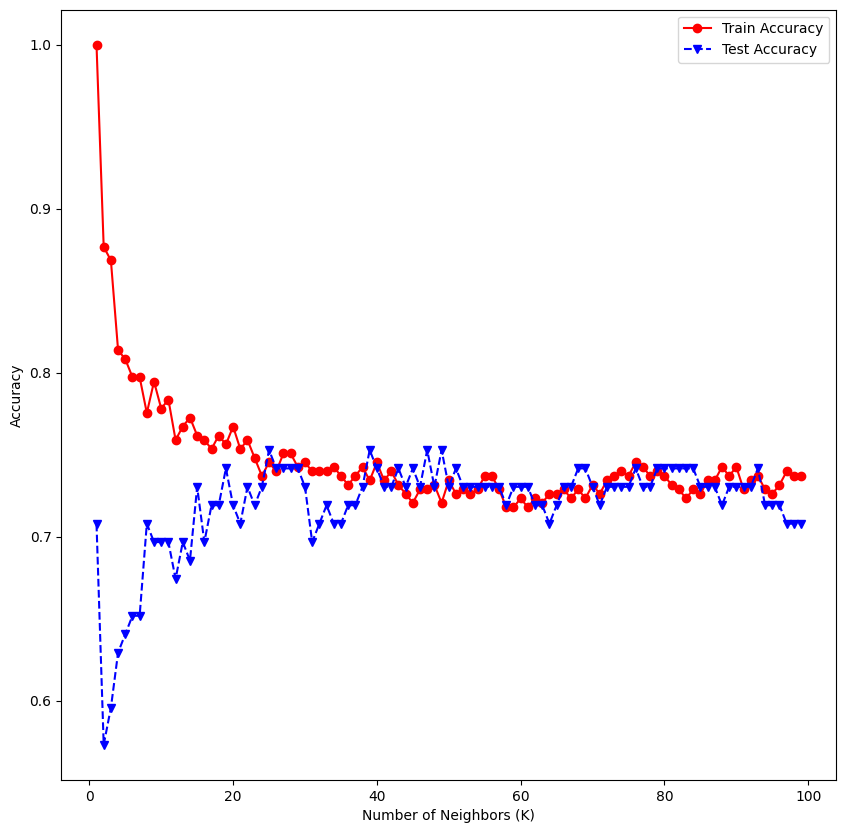

In [138]:
plt.figure(figsize = (10,10))
plt.plot(k,train_acc,'ro-',k,test_acc,'bv--')
plt.legend(['Train Accuracy','Test Accuracy'])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy');

In [139]:
for x in k:
    print('Number of neighbors = ', x, "Train accuracy = ", train_acc[x-1], "Test Accuracy = ", test_acc[x-1], "Difference = ",
         (abs(train_acc[x-1] - test_acc[x-1])*100), "%")

Number of neighbors =  1 Train accuracy =  1.0 Test Accuracy =  0.7078651685393258 Difference =  29.21348314606742 %
Number of neighbors =  2 Train accuracy =  0.8767123287671232 Test Accuracy =  0.5730337078651685 Difference =  30.367862090195473 %
Number of neighbors =  3 Train accuracy =  0.8684931506849315 Test Accuracy =  0.5955056179775281 Difference =  27.298753270740338 %
Number of neighbors =  4 Train accuracy =  0.8136986301369863 Test Accuracy =  0.6292134831460674 Difference =  18.448514699091888 %
Number of neighbors =  5 Train accuracy =  0.8082191780821918 Test Accuracy =  0.6404494382022472 Difference =  16.77697398799446 %
Number of neighbors =  6 Train accuracy =  0.7972602739726027 Test Accuracy =  0.651685393258427 Difference =  14.557488071417568 %
Number of neighbors =  7 Train accuracy =  0.7972602739726027 Test Accuracy =  0.651685393258427 Difference =  14.557488071417568 %
Number of neighbors =  8 Train accuracy =  0.7753424657534247 Test Accuracy =  0.7078651

In [140]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [36],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose  = 1,
    cv = 10,
    return_train_score=False,
    scoring= 'accuracy',
    n_jobs = -1
    )
    
knn_grid.fit(X_smote, y_smote)
    

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [36],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [141]:
knn_grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [142]:
knn_bestgrid=knn_grid.best_estimator_

In [143]:
knn_bestgrid

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

In [144]:
y_pred=knn_bestgrid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[42  7]
 [17 23]]
Accuracy Score 0.7303370786516854
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        49
           1       0.77      0.57      0.66        40

    accuracy                           0.73        89
   macro avg       0.74      0.72      0.72        89
weighted avg       0.74      0.73      0.72        89



In [145]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(knn_bestgrid,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7601889683350358 +/- 0.041668528155076566


# Soft Voting

In [146]:
from sklearn.ensemble import VotingClassifier
estimator = []
estimator.append(('RF',RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)))
estimator.append(('SVC', SVC(C=100, gamma=0.1,probability=True)))
estimator.append(('ABC',AdaBoostClassifier(n_estimators=50,learning_rate=1)))
estimator.append(('Bag',BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=5,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)))



# Voting Classifier with soft voting
Hyper_vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
Hyper_vot_soft.fit(X_smote, y_smote)
y_pred = Hyper_vot_soft.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Soft Voting Score  0
[[41  8]
 [19 21]]
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        49
           1       0.72      0.53      0.61        40

    accuracy                           0.70        89
   macro avg       0.70      0.68      0.68        89
weighted avg       0.70      0.70      0.69        89



In [147]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(Hyper_vot_soft,X,Y,cv=skfold)
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/bikash/Desktop/keras/Georgia

Results =  0.741956077630235 +/- 0.04254244597662852


# ZeroR

In [148]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 20)
dummy_clf.fit(X_smote, y_smote)
y_pred = dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_smote, dummy_clf.predict(X_smote)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        49
           1       0.00      0.00      0.00        40

    accuracy                           0.55        89
   macro avg       0.28      0.50      0.36        89
weighted avg       0.30      0.55      0.39        89

Train Accuracy:  0.5287671232876713
Test Accuracy:  0.550561797752809


/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bikash/Desktop/keras/Georgian College/Machine learning programming/FinalProject/ve/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined an

In [149]:
y_pred = dummy_clf.predict(X_test)

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

Auc Curve

In [150]:
DTC2=BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
DTC2.fit(X_smote, y_smote)


DTC3=DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=0)
DTC3.fit(X_smote, y_smote)

rf_randomcv2= RandomForestClassifier(max_depth=780, max_features='log2', n_estimators=600)
rf_randomcv2.fit(X_smote, y_smote)

SVC2=SVC(C=100, gamma=0.1,probability=True)
SVC2.fit(X_smote, y_smote)

lr_grid2= lr_bestgrid
lr_grid2.fit(X_smote, y_smote)

gs_NB2=gs_NB
gs_NB2.fit(X_smote, y_smote)

XGB_clf2=XGBClassifier(colsample_bytree = 0.8,
 gamma= 1,
 max_depth= 3,
 min_child_weight= 1,
 subsample= 0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
XGB_clf2.fit(X_smote, y_smote)

knn_grid2= KNeighborsClassifier(n_neighbors=95,metric='manhattan', weights='distance')
knn_grid2.fit(X_smote, y_smote)


KNeighborsClassifier(metric='manhattan', n_neighbors=95, weights='distance')

In [151]:
final_roc_auc = []

In [152]:
#use the model to predict the target values for test dataset. We are storing the predicted class by all the models and we will use it to get the ROC AUC score
probas1 = dummy_clf.predict_proba(X_test)[:, 1]
probas2 = DTC2.predict_proba(X_test)[:, 1]
probas3 = knn_grid2.predict_proba(X_test)[:, 1]
probas4 = SVC2.predict_proba(X_test)[:, 1]
probas5 = rf_randomcv2.predict_proba(X_test)[:, 1]
probas6 = gs_NB2.predict_proba(X_test)[:, 1]
probas7 = abc.predict_proba(X_test)[:, 1]
probas8 = XGB_clf2.predict_proba(X_test)[:, 1]
probas9 = lr_grid2.predict_proba(X_test)[:, 1]
probas10 = Hyper_vot_soft.predict_proba(X_test)[:, 1]
probas11 = DTC3.predict_proba(X_test)[:, 1]

In [153]:
# get False Positive Rates and True Postive rates for the Classifiers because these will be used to plot the ROC Curve.
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, probas1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, probas2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, probas3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, probas4)
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, probas5)
false_positive_rate6, true_positive_rate6, threshold6 = roc_curve(y_test, probas6)
false_positive_rate7, true_positive_rate7, threshold6 = roc_curve(y_test, probas7)
false_positive_rate8, true_positive_rate8, threshold6 = roc_curve(y_test, probas8)
false_positive_rate9, true_positive_rate9, threshold6 = roc_curve(y_test, probas9)
false_positive_rate10, true_positive_rate10, threshold6 = roc_curve(y_test, probas10)
false_positive_rate11, true_positive_rate11, threshold6 = roc_curve(y_test, probas11)

In [154]:
print('roc_auc_score for ZeroR Classifier: ', roc_auc_score(y_test, probas1))
print('roc_auc_score for Bagging DecisionTree: ', roc_auc_score(y_test, probas2))
print('roc_auc_score for KNN Classifier: ', roc_auc_score(y_test, probas3))
print('roc_auc_score for SVM Classifier: ', roc_auc_score(y_test, probas4))
print('roc_auc_score for Random Forest Classifier: ', roc_auc_score(y_test, probas5))
print('roc_auc_score for Naive Bays Classifier: ', roc_auc_score(y_test, probas6))
print('roc_auc_score for Ada Boost Classifier: ', roc_auc_score(y_test, probas7))
print('roc_auc_score for XG Boost Classifier: ', roc_auc_score(y_test, probas8))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, probas9))
print('roc_auc_score for Voting Classifier: ', roc_auc_score(y_test, probas10))
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, probas11))

roc_auc_score for ZeroR Classifier:  0.5
roc_auc_score for Bagging DecisionTree:  0.7553571428571428
roc_auc_score for KNN Classifier:  0.8224489795918367
roc_auc_score for SVM Classifier:  0.8209183673469388
roc_auc_score for Random Forest Classifier:  0.7627551020408163
roc_auc_score for Naive Bays Classifier:  0.8035714285714286
roc_auc_score for Ada Boost Classifier:  0.7867346938775509
roc_auc_score for XG Boost Classifier:  0.7607142857142857
roc_auc_score for Logistic Regression:  0.8066326530612244
roc_auc_score for Voting Classifier:  0.8158163265306122
roc_auc_score for DecisionTree:  0.7239795918367347


In [155]:
final_roc_auc.append({'model_name': 'ZeroR Classifier', 'fpr': false_positive_rate1, 'tpr': true_positive_rate1, 'auc': roc_auc_score(y_test, probas1)})
final_roc_auc.append({'model_name': 'Bagging Decision Tree Classifier', 'fpr': false_positive_rate2, 'tpr': true_positive_rate2, 'auc': roc_auc_score(y_test, probas2)})
final_roc_auc.append({'model_name': 'KNeighbors Classifier', 'fpr': false_positive_rate3, 'tpr': true_positive_rate3, 'auc': roc_auc_score(y_test, probas3)})
final_roc_auc.append({'model_name': 'SVM Classifier', 'fpr': false_positive_rate4, 'tpr': true_positive_rate4, 'auc': roc_auc_score(y_test, probas4)})
final_roc_auc.append({'model_name': 'Random Forest Classifier', 'fpr': false_positive_rate5, 'tpr': true_positive_rate5, 'auc': roc_auc_score(y_test, probas5)})
final_roc_auc.append({'model_name': 'Naive Bays Classifier', 'fpr': false_positive_rate6, 'tpr': true_positive_rate6, 'auc': roc_auc_score(y_test, probas6)})
final_roc_auc.append({'model_name': 'Ada Boost Classifier', 'fpr': false_positive_rate7, 'tpr': true_positive_rate7, 'auc': roc_auc_score(y_test, probas7)})
final_roc_auc.append({'model_name': 'XG Boost Classifier', 'fpr': false_positive_rate8, 'tpr': true_positive_rate8, 'auc': roc_auc_score(y_test, probas8)})
final_roc_auc.append({'model_name': 'Logistic Regression', 'fpr': false_positive_rate9, 'tpr': true_positive_rate9, 'auc': roc_auc_score(y_test, probas9)})
final_roc_auc.append({'model_name': 'Voting Classifier', 'fpr': false_positive_rate10, 'tpr': true_positive_rate10, 'auc': roc_auc_score(y_test, probas10)})
final_roc_auc.append({'model_name': 'Decision Tree Classifier', 'fpr': false_positive_rate11, 'tpr': true_positive_rate11, 'auc': roc_auc_score(y_test, probas11)})

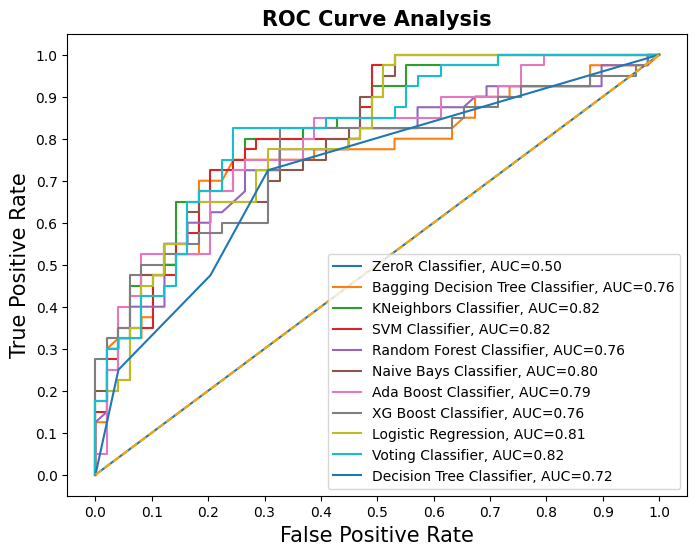

In [156]:
fig = plt.figure(figsize=(8,6))

for m in final_roc_auc:
    plt.plot(m['fpr'], 
             m['tpr'], 
             label="{}, AUC={:.2f}".format(m['model_name'], m['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()